# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: How many users are registered users or casual users? In which city is the service most popular? What is the average time for which users rent bicycle for?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [59]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *   
import pandas as pd

In [62]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        
            trip_reader = csv.DictReader(f_in)
            
            first_trip = next(trip_reader)
      
            pprint(first_trip)

        
    
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
{'bikeid': '17109',
 'birth year': '',
 'end station id': '401',
 'end station latitude': '40.72019576',
 'end station longitude': '-73.98997825',
 'end station name': 'Allen St & Rivington St',
 'gender': '0',
 'start station id': '532',
 'start station latitude': '40.710451',
 'start station longitude': '-73.960876',
 'start station name': 'S 5 Pl & S 4 St',
 'starttime': '1/1/2016 00:09:55',
 'stoptime': '1/1/2016 00:23:54',
 'tripduration': '839',
 'usertype': 'Customer'}

City: Chicago
{'bikeid': '2295',
 'birthyear': '1990',
 'from_station_id': '156',
 'from_station_name': 'Clark St & Wellington Ave',
 'gender': 'Male',
 'starttime': '3/31/2016 23:30',
 'stoptime': '3/31/2016 23:46',
 'to_station_id': '166',
 'to_station_name': 'Ashland Ave & Wrightwood Ave',
 'trip_id': '9080545',
 'tripduration': '926',
 'usertype': 'Subscriber'}

City: Washington
{'Bike number': 'W20842',
 'Duration (ms)': '427387',
 'End date': '3/31/2016 23:04',
 'End station': 'Georgia Ave and Fa

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two. It also turns out that there are some trips in the New York city dataset that do not have an attached user type. Since we don't have enough information to fill these values in, just leave them as-is for now.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [47]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    """
    
    
    
    if city == 'Washington':
        duration = datum['Duration (ms)']
        duration = int(duration)
        duration /= 60000
        
    else:
        duration = datum['tripduration']
        duration = int(duration)
        duration /= 60
    
    return duration


tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [48]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    """
   
    
    if city == 'Washington':
        date = datum['Start date']
        date = datetime.strptime(date, '%m/%d/%Y %H:%M')
        month = datetime.strftime(date, '%-m')
        hour = datetime.strftime(date, '%H')
        day_of_week = datetime.strftime(date, '%A')

    elif city == 'NYC':
        date = datum['starttime']
        date = datetime.strptime(date, '%m/%d/%Y %H:%M:%S')    #  1/1/2016 00:09:55
        month = datetime.strftime(date, '%-m')
        hour = datetime.strftime(date, '%-H')
        day_of_week = datetime.strftime(date, '%A')

    else:
        date = datum['starttime']
        date = datetime.strptime(date, '%m/%d/%Y %H:%M')
        month = datetime.strftime(date, '%-m')
        hour = datetime.strftime(date, '%H')
        day_of_week = datetime.strftime(date, '%A')


    return int(month), int(hour), str(day_of_week)



tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [36]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    """
    
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    elif city == 'Chicago':
        user_type = datum['usertype']
    else:
        user_type = datum['usertype']
    
    return user_type



tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [49]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        
        trip_reader = csv.DictReader(f_in)

        
        for row in trip_reader:
            
            new_point = {}

            duration1 = duration_in_mins(row, city)
            month1, hour1, day_of_week1 = time_of_trip(row, city)
            user_type1 = type_of_user(row, city)
            new_point['duration'] = duration1
            new_point['month'] = month1
            new_point['hour'] = hour1
            new_point['day_of_week'] = day_of_week1
            new_point['user_type'] = user_type1

            trip_writer.writerows([new_point])
            
            

In [50]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)

for city, filenames in city_info.items():
    print_first_point(filenames['out_file'])


City: NYC
{'day_of_week': 'Friday',
 'duration': '13.983333333333333',
 'hour': '0',
 'month': '1',
 'user_type': 'Customer'}

City: Washington
{'day_of_week': 'Thursday',
 'duration': '7.123116666666666',
 'hour': '22',
 'month': '3',
 'user_type': 'Subscriber'}

City: Chicago
{'day_of_week': 'Thursday',
 'duration': '15.433333333333334',
 'hour': '23',
 'month': '3',
 'user_type': 'Subscriber'}


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: New York City was highest number of trips. Also, NYC has highest proportion of trips made by subscribers. Chicago has highest number of trips made by customers.

In [51]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            elif row['user_type'] == 'Customer':
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [52]:
data_file = {'NYC': './data/NYC-2016-Summary.csv',
             'Washington': './data/Washington-2016-Summary.csv',
             'Chicago': './data/Chicago-2016-Summary.csv'}


for city, files in data_file.items():
    n_subscribers, n_customers, n_total = number_of_trips(files)
    print("For the city {}, there were total {} trips made. Of which, {} were made by subsribers and {} by customers.".format(city, n_total, n_subscribers, n_customers))
    

For the city NYC, there were total 276081 trips made. Of which, 245896 were made by subsribers and 30185 by customers.
For the city Washington, there were total 66326 trips made. Of which, 51753 were made by subsribers and 14573 by customers.
For the city Chicago, there were total 72131 trips made. Of which, 54982 were made by subsribers and 17149 by customers.


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: The average trip lengths for NYC was 15 minutes, for Washington was 18 minutes and for Chicago it was 16 minutes. For NYC 7.30 % of total trips were more than 30 minutes. Whereas for Washington, 10.84 % of total trips were more than 30 minutes. 8.33 % of total trips for Chicago were more than 30 minutes.

In [53]:
def average_trip(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """

    with open(filename, 'r') as f_in:
        # set up csv reader object
        
        total_duration = 0
        count = 0
        more_than_thirty = 0
        reader = csv.DictReader(f_in)        
        for row in reader:
            if row['duration']:
                duration1 = float(row['duration'])
                total_duration += duration1
                count += 1
            if duration1 > 30:
                more_than_thirty += 1


    average_duration = int(total_duration) / count

    return int(average_duration), more_than_thirty, count


nyc_average_duration, nyc_more_than_thirty, nyc_count = average_trip('./data/NYC-2016-Summary.csv')
wash_average_duration, wash_more_than_thirty, wash_count = average_trip('./data/Washington-2016-Summary.csv')
chi_average_duration, chi_more_than_thirty, chi_count = average_trip('./data/Chicago-2016-Summary.csv')

nyc_propor = (nyc_more_than_thirty / nyc_count) * 100
wash_propor = (wash_more_than_thirty / wash_count) * 100
chi_propor = (chi_more_than_thirty / chi_count) * 100
print("In NYC, the average trip duration was {} minutes, while {:0.2f} % of total trips were more than 30 minutes.".format(
    nyc_average_duration, nyc_propor))
print("In Washington, the average trip duration was {} minutes, while {:0.2f} % of total trips were more than 30 minutes.".format(
    wash_average_duration, wash_propor))
print("In Chicago, the average trip duration was {} minutes, while {:0.2f} % of total trips were more than 30 minutes.".format(
    chi_average_duration, chi_propor))



In NYC, the average trip duration was 15 minutes, while 7.30 % of total trips were more than 30 minutes.
In Washington, the average trip duration was 18 minutes, while 10.84 % of total trips were more than 30 minutes.
In Chicago, the average trip duration was 16 minutes, while 8.33 % of total trips were more than 30 minutes.


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: City selected here is Washington. For Washington, Customers took longer rides than Subscribers.

In [54]:
def ridership_stats(filename):
    """ This function determines which type of User takes
        longer rides on average by reading a CSV file.
    """

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        subscriber_count = 0
        customer_count = 0
        subscriber_duration = 0
        customer_duration = 0
        
        for row in reader:            
            if row['user_type'] == 'Subscriber':
                subscriber_duration1 = float(row['duration'])
                subscriber_duration += subscriber_duration1
                subscriber_count += 1
            elif row['user_type'] == 'Customer':
                customer_duration1 = float(row['duration'])
                customer_duration += customer_duration1
                customer_count += 1

        avg_cust_dur = customer_duration / customer_count
        avg_sub_dur = subscriber_duration / subscriber_count

        return avg_cust_dur, avg_sub_dur




avg_cust_dur, avg_sub_dur = ridership_stats('./data/Washington-2016-Summary.csv')

print("For Washington in 2016, the average trip duration for Customer was {:0.2f} minutes\nand for Subscriber it was {:0.2f} minutes.".format(avg_cust_dur, avg_sub_dur))

For Washington in 2016, the average trip duration for Customer was 41.68 minutes
and for Subscriber it was 12.53 minutes.


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

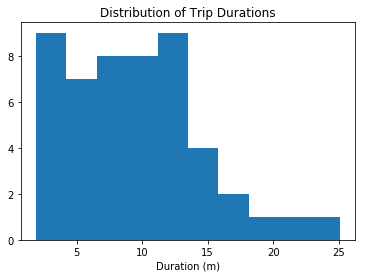

In [5]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

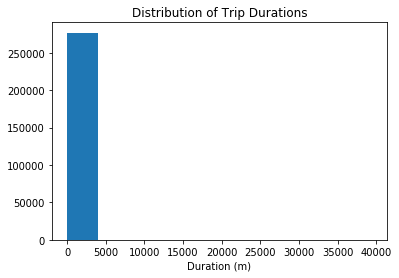

In [66]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
import matplotlib.pyplot as plt
%matplotlib inline

def plot_trips(filename):

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        trips = []
        for row in reader:
            trips.append(float(row['duration']))

    return trips

data_file = {'NYC': './data/NYC-2016-Summary.csv'}

for city, files in data_file.items():
    plt.hist(plot_trips(files))
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The above question was answered using ggplot's histogram. The city selected for this is Washington. Firstly, for Customers; the peak of distribution was around 15-20 minutes. For Subscribers, the peak was 5-10 minutes. The distribution was normal Gaussian - Log Normal Distribution to be precise. Both the graphs have a positive skewness.

In [60]:
# NOTE - I was not able to do this using matplotlib, but I got around it after using ggplot.
# And this shouldn't be a problem as my visualizations answer the questions, also is a lot faster than matplotlib's hist()
# I already know pandas in blog I used to study earlier - https://bitbucket.org/hrojas/learn-pandas
# Faceting - http://blog.yhat.com/posts/ggplot-for-python.html

# %matplotlib inline

def plot_histogram(filename):
    """This function reads CSV file in a dataframe 
        and plots a histogram using ggplot.
    """
    
    
    df = pd.read_csv(filename)  # Reading the csv file in dataframe.
    
    df = df[df['duration']<75]  # Limiting the duration to 75 mins, and saving new dataframe to the same one
    
    # Begin aesthetic mapping
    
    plot = ggplot(aes(x='duration'), data=df) +\
    geom_histogram(bins=15, color='black', alpha=0.7) +\
    ggtitle('Travel Duration for Subscribers and Customers for Washington')+\
    xlab('Duration (minutes)') +\
    ylab('Number of Trips') +\
    xlim(0, 75)+\
    facet_grid(None,'user_type', scales='free_y')  # x_facet, f_facet, Scales - varies across Y-Axis
    plot.show()

    
    
# Thanks for the hint about data types for histogram! 
# I was able to plot this same using matplotlib by converting the values to float type before appending!
# Code - 

# def plot_trips(filename):

#     with open(filename, 'r') as f_in:
#         # set up csv reader object
#         reader = csv.DictReader(f_in)
#         trips = []
#         for row in reader:
#             trips.append(float(row['duration']))

#     return trips

# data_file = {'NYC': './data/NYC-2016-Summary.csv'}

# for city, files in data_file.items():
#     plt.hist(plot_trips(files))
#     plt.title('Distribution of Trip Durations')
#     plt.xlabel('Duration (m)')
#     plt.show()


Here's a histogram for Washington


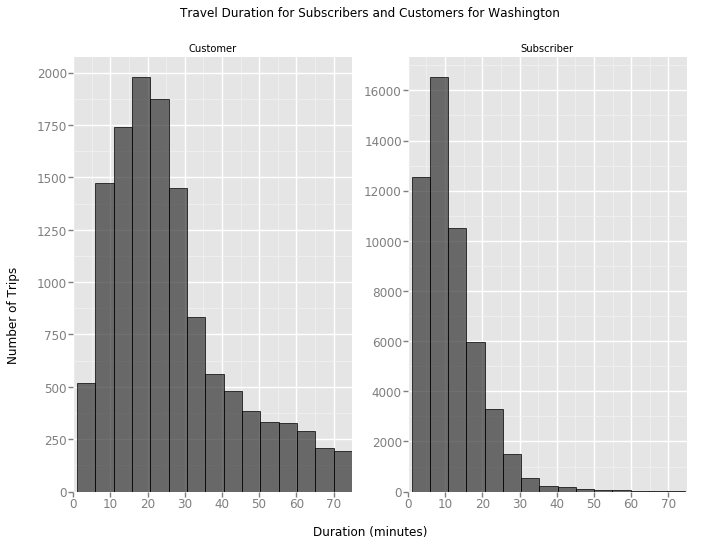

In [61]:
data_file = {'Washington': './data/Washington-2016-Summary.csv'}


for city, files in data_file.items():
    print("Here's a histogram for " + city)
    plot_histogram(files)


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: For a given city, which day is most popular amongst Customers and Subscriber? I saw after plotting a bar chart graph for Chicago that the services were in most demand during weekends by the Customers. On the rest of the days, the use of the services was hugely dominated by Subscribers.

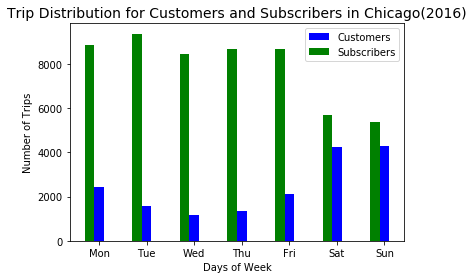

In [58]:
%matplotlib inline

def plot_trips(filename):
    """This function counts the number of trips for Customers and Subscribers
        for each day and stores the values in a nested dictionary.
    """
    
    days_of_weeks = {'Subscriber': {
                                    'Monday': 0,
                                    'Tuesday': 0,
                                    'Wednesday': 0,
                                    'Thursday': 0,
                                    'Friday': 0,
                                    'Saturday': 0,
                                    'Sunday': 0},
                    'Customer' : {
                                    'Monday': 0,
                                    'Tuesday': 0,
                                    'Wednesday': 0,
                                    'Thursday': 0,
                                    'Friday': 0,
                                    'Saturday': 0,
                                    'Sunday': 0},
                         }

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
       
        for row in reader:
                for user_type, days in days_of_weeks.items():
                    if row['user_type'] in user_type:
                        for day in days:
                            if row['day_of_week'] in day:
                                days_of_weeks[user_type][day] +=1
           
    return days_of_weeks


days_of_weeks = plot_trips('./data/Chicago-2016-Summary.csv')

#This code below returns a list of values for 7 days in proper order of days of week.

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
subscriber_count = [0, 0, 0, 0, 0, 0, 0]
customer_count = [0, 0, 0, 0, 0, 0, 0]
weekdays_x = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


for i in range(0, len(weekdays)):
    if weekdays[i] in days_of_weeks['Subscriber']:
        subscriber_count[i] += days_of_weeks["Subscriber"][weekdays[i]]
    if weekdays[i] in days_of_weeks['Customer']:
        customer_count[i] += days_of_weeks["Customer"][weekdays[i]]

#Plotting the bar chart

X = np.arange(len(customer_count))
ax = plt.subplot(111)
ax.bar(X, customer_count, width=0.2, color='b', align='center')
ax.bar(X-0.2, subscriber_count, width=0.2, color='g', align='center')
ax.legend(('Customers','Subscribers'))
ax.set_xlabel("Days of Week")
ax.set_ylabel("Number of Trips")
plt.xticks(X, weekdays_x)
plt.title("Trip Distribution for Customers and Subscribers in Chicago(2016)", fontsize=14)
plt.show() # this is not required, although without this a text was appearing on top of graph.


    



<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Maybe apply the same approach and try to figure out which products are best for which region for a particular company? Also something more fun like - analysis tweets made by Donald Trump at what time. The bar chart distribution for that'd be fun to see! 

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.